## Sesi 14

Unsupervised Learning
- Dimensionality Reduction
- Clustering

## PCA

In [1]:
from sklearn.datasets import load_breast_cancer

In [10]:
bc = load_breast_cancer()

In [12]:
bc_data = bc.data

In [13]:
bc_data[0:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [14]:
bc_labels = bc.target

In [15]:
bc_labels[0:5]

array([0, 0, 0, 0, 0])

In [16]:
import numpy as np

labels = np.reshape(bc_labels, (569,1))

In [18]:
final_breast_data = np.concatenate([bc_data,labels], axis=1)

In [19]:
final_breast_data[0:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01,
        0.000e+00]])

In [20]:
import pandas as pd

In [21]:
breast_dataset = pd.DataFrame(final_breast_data)

In [22]:
breast_dataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


In [23]:
feature = bc.feature_names

In [25]:
feature_labels = np.append(feature,'label')

In [26]:
feature_labels

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'label'], dtype='<U23')

In [27]:
breast_dataset.columns = feature_labels

In [28]:
breast_dataset.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


In [35]:
breast_dataset["label"].replace(0,"Benign",inplace=True)
breast_dataset["label"].replace(0,"Malignant",inplace=True)

In [37]:
breast_dataset.tail(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039,Malignant


In [38]:
from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:,feature].values

In [40]:
x = StandardScaler().fit_transform(x)

In [41]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [43]:
normalised_breast = pd.DataFrame(x)
normalised_breast.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [45]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalCompo_breast = pca_breast.fit_transform(x)

In [47]:
pc_breast_df = pd.DataFrame(data=principalCompo_breast,
                           columns=[
                               "principal com 1",
                               "principal com 2"
                           ])

In [48]:
pc_breast_df.head()

,principal com 1,principal com 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [51]:
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

### Visualisasinya

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

<Figure size 432x288 with 0 Axes>

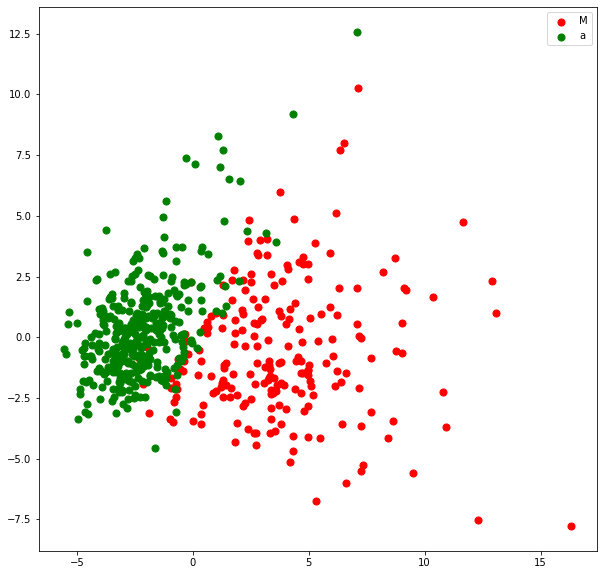

In [66]:
#buat figure

plt.figure()
plt.figure(figsize=(10,10))

#target
target = ["Benign","Malignant"]
colors = ["r","g"]

for target, color in zip(target,colors):
    indicesToKeep = breast_dataset["label"] == target
    plt.scatter(
                pc_breast_df.loc[indicesToKeep, "principal com 1"],
                pc_breast_df.loc[indicesToKeep, "principal com 2"],
                c = color,
                s = 50
                )
plt.legend(target)

plt.show()

## K-Means Clustering

https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline

In [68]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [69]:
data.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [70]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [76]:
kmeans = KMeans(
            n_clusters=2,
            init="k-means++"
            #max_iter
            )

kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [77]:
kmeans.inertia_

2599.3873849123056

In [78]:
SSE = [] #Sum Square Error

for cluster in range(1,20):
    kmeans = KMeans(
                    n_clusters= cluster,
                   init="k-means++")
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

In [79]:
SSE

[3520.0000000000014,
 2599.3855593561393,
 2149.2839562217573,
 1851.8408722743866,
 1549.5879962884385,
 1313.9619874240173,
 1189.899593468135,
 1057.89928956306,
 975.032127044556,
 915.981379946918,
 878.8832505720393,
 805.8607148380736,
 771.6363939396265,
 712.9624287272038,
 683.4618347114351,
 664.0654171213204,
 618.7309134699003,
 607.139433649125,
 574.0460578312479]

In [80]:
# buat ke data frame untuk visualisasi

In [81]:
frame = pd.DataFrame(
        {"Cluster": range(1,20),
        "SSE": SSE}
        )

In [82]:
frame.head()

,Cluster,SSE
0,1,3520.000000
1,2,2599.385559
2,3,2149.283956
3,4,1851.840872
4,5,1549.587996


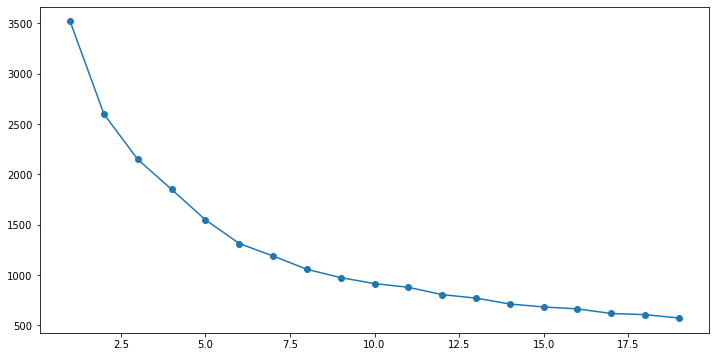

In [87]:
plt.figure(figsize=(12,6))
plt.plot(frame["Cluster"],
         frame["SSE"],
         marker="o")

plt.show()

In [88]:
kmeans = KMeans(
            n_clusters=6,
            init="k-means++"
            #max_iter
            )

kmeans.fit(data_scaled)

KMeans(n_clusters=6)

In [89]:
pred = kmeans.predict(data_scaled)

In [90]:
frame_pred = pd.DataFrame(data_scaled)
frame_pred["Cluster"] = pred

In [91]:
frame_pred

,0,1,2,3,4,5,6,7,Cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,3
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,4
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,4
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,3


In [93]:
frame_pred["Cluster"].value_counts()

3    179
0    124
2     86
4     39
1     11
5      1
Name: Cluster, dtype: int64

### Save and Load Model

In [94]:
import pickle #this guy

In [99]:
pickle.dump(kmeans,
           open("Nama Model.sav","wb"))

#wb pas nyimpan, write binary
#rb pas load, read binary